In [40]:
%run ./read_weather_data_from_api.ipynb


Weater in San Diego, US:
Condition: broken clouds
Temperature: 21.27000000000004C
Humidity: 82%
Wind Speed: 5.14 m/s
Pressure: 1017 hPa


In [41]:

data_all = [{'t2m':temperature, 'msl':pres, 'r':humidity}]; 
data_all

df_input_all = pd.DataFrame(data_all)

df_input_all

,t2m,msl,r
0,294.42,1017,82


In [42]:
# call the appropriate script 

# Check the value of Temperature

if temperature-273.15 < 0:
    %run ./2a_model_development_airtemp_lt_0_cold.ipynb
elif temperature-273.15 > 23:
    %run ./2b_model_development_airtemp_gt_23_warm.ipynb
else:
    precip_predict_model = -1

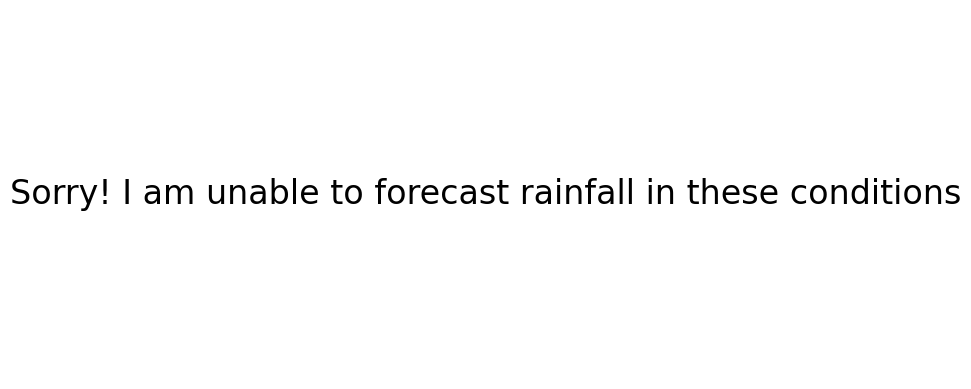

In [46]:
# now do the prediction

if precip_predict_model != -1:
    precip_predict_model = lr.predict(df_input_all)



import matplotlib.pyplot as plt

# Set the font size (you can adjust this value)
font_size = 24

if 0 < precip_predict_model < 3:
    text = "There is no chance of rainfall today! You may want to plan some outdoor activities."
    color = 'grey'
elif 3 < precip_predict_model < 6:
    text = "There is a moderate chance of rainfall today."
    color = 'orange'
elif precip_predict_model >= 6:
    text = "There is a high chance of rainfall today."
    color = 'red'
else:
    text = "Sorry! I am unable to forecast rainfall in these conditions."
    color = 'black'

# Create a figure and axis
fig, ax = plt.subplots()

# Set the text properties, including font size and color
ax.text(0.5, 0.5, text, fontsize=font_size, color=color, ha='center', va='center')

# Remove axis labels and ticks
ax.axis('off')

# Display the text
plt.show()

